# Importing 

"""

Time series analysis of data 

"""

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Achievement 6'
df= pd.read_csv(os.path.join(path, 'Data','citibike.csv'), index_col= False)

In [3]:
df.head()
"""
.head()
Return the first n rows.

"""

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0


# Cleaning data

In [7]:
# dropping rows with null values
df = df.dropna()
"""
.drop()
Drop specified rows or columns.

"""

In [8]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
5,HbKJBz,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [18]:
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['end_date'] = pd.to_datetime(df['end_time']).dt.date
"""

.to_datetime
returns the data formatted as a datatime object

"""

In [68]:
df_test = df[['start_date','trip_duration']]
df_test.head()

,start_date,trip_duration
0,2013-09-09,993
1,2013-09-12,581
2,2013-09-18,361
3,2013-09-28,561
5,2013-09-27,427


In [75]:
# Creating dataframe for analysis
df2 = df_test.groupby('start_date')['trip_duration'].mean().reset_index() # taking the average of the trip duration per day
df2.head()
"""

.groupby()
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.
"""

,start_date,trip_duration
0,2013-09-01,835.948586
1,2013-09-02,751.578735
2,2013-09-03,763.024320
3,2013-09-04,788.075178
4,2013-09-05,783.556328


# Starting Time Analysis

In [76]:
# Set the "Date" column as the index

from datetime import datetime

df2['datetime'] = pd.to_datetime(df2['start_date']) # Create a datetime column from "Date.""
df2 = df2.set_index('datetime') # Set the datetime as the index of the dataframe.
df2.drop(['start_date'], axis=1, inplace=True) # Drop the "Date" column.
df2.head()
"""
.set_index()

sets the column as index of the dataframe

"""

,trip_duration
datetime,
2013-09-01,835.948586
2013-09-02,751.578735
2013-09-03,763.024320
2013-09-04,788.075178
2013-09-05,783.556328


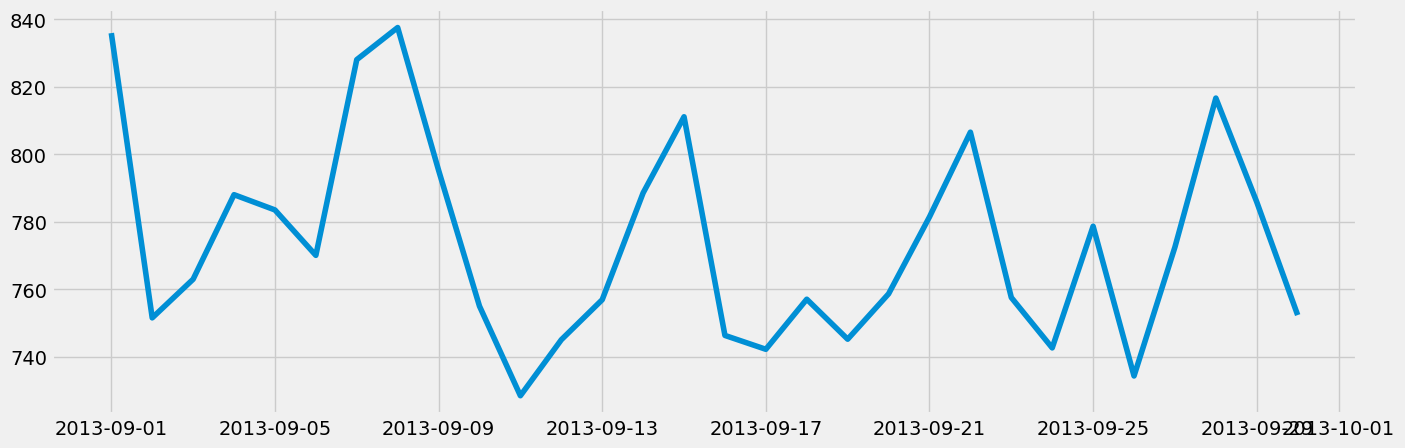

In [77]:
# Plot the data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2)
"""

.figure()
Create a new figure.

.plot()

creates plot with given data

"""

In [78]:
# checking the decomp
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

"""
sm.tsa.seasonal_decompose()

decomposes a time seris into its seasonal trend and residul components
"""

In [79]:
from pylab import rcParams # This will define a fixed size for all the charts.

rcParams['figure.figsize'] = 18, 7

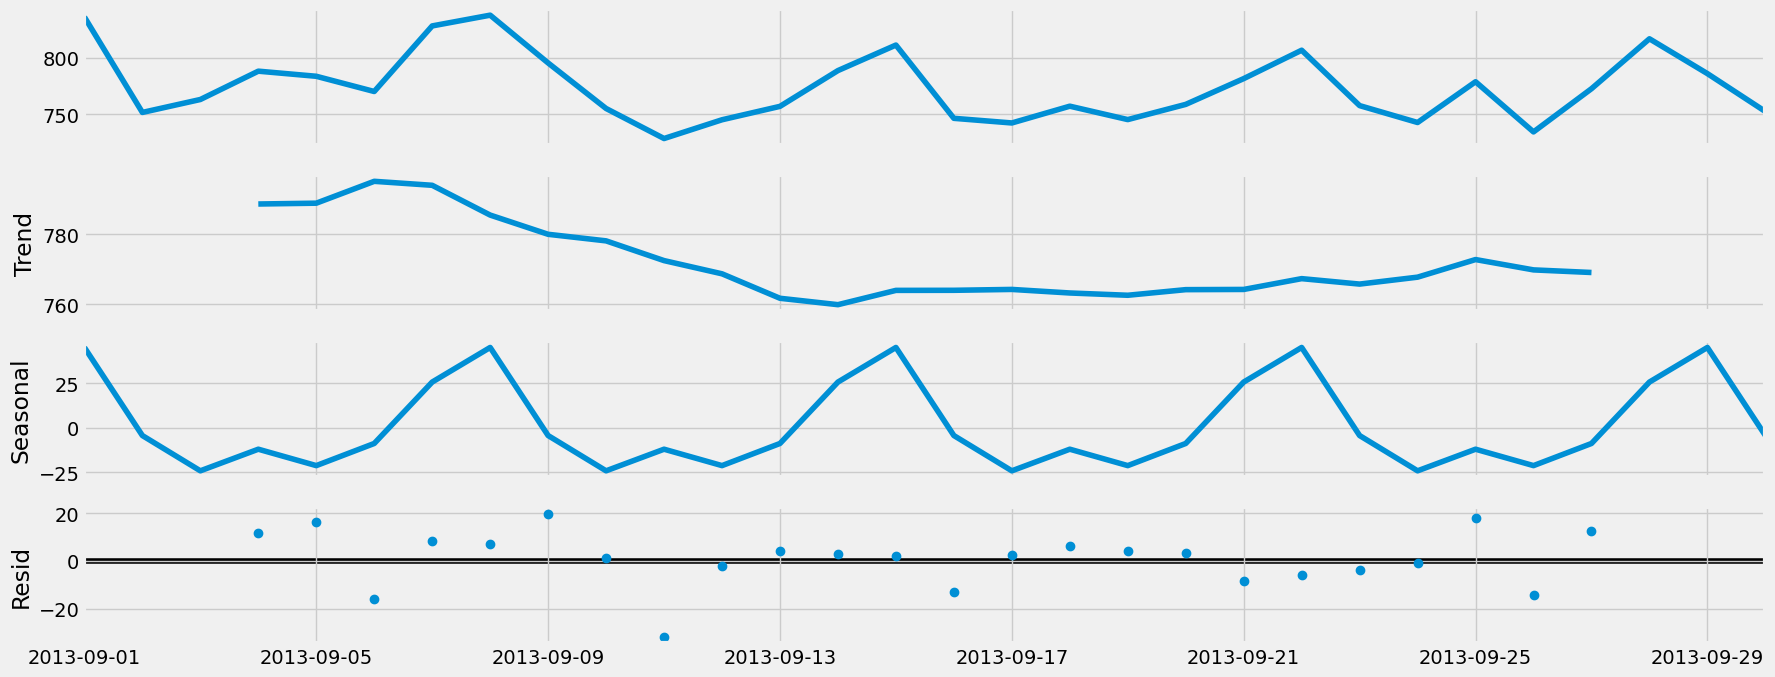

In [80]:
# Plot the separate components

decomposition.plot()
plt.show()

## Decomp analysis
There appears to both be a trend and seasonality which indicates a non-stationary data set. Overall the trend is mostly flat indicating a weak overall trend, but there is spikes in the seasonality of the data. 

In [82]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
"""
Creating the function dickey_fuller

Print method
Prints the values to a stream, or to sys.stdout by default.

adfuller()

performs Augmented Dickey-Fuller test

.Series()

creates a one dimensional array like object
"""
# Apply the test using the function on the time series
dickey_fuller(df2['trip_duration'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.391234
p-value                         0.144226
Number of Lags Used             9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


## Dickey-Fuller test analysis
We have a test stastic larger than any crictal value meaning we can't reject the null hypothesis and the set needs to be Stationarized.

# Stationarizing Data

In [84]:
df_st = df2 - df2.shift(1)
df_st.dropna(inplace = True)
"""

.shift()
shifts the values in a dataframe or series by a specified period

.dropna()
removes all null entries
"""

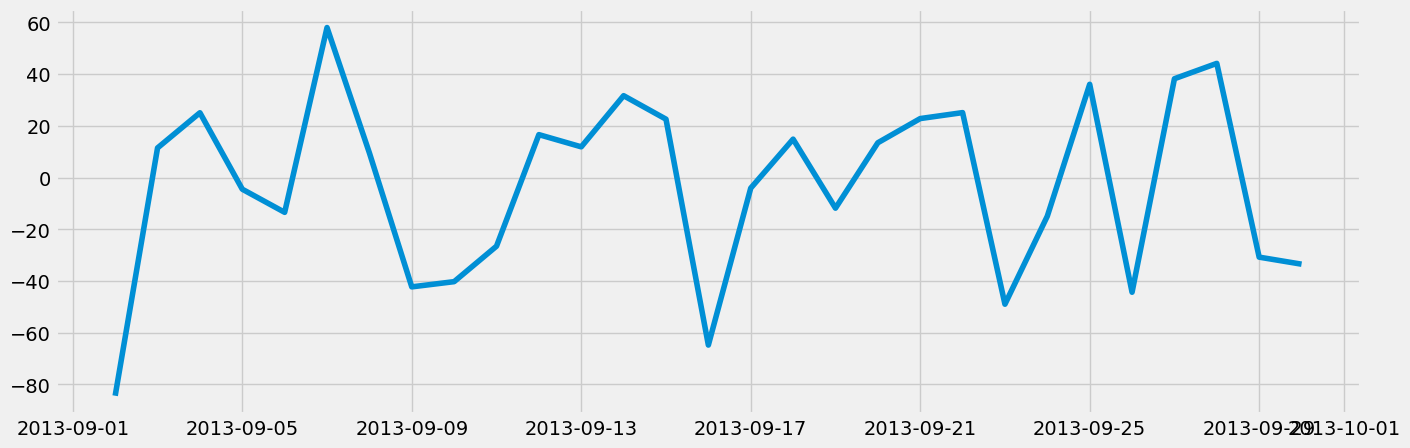

In [85]:
# Plot the stationarized data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_st)

In [86]:
dickey_fuller(df_st)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.090979
p-value                         0.718656
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [87]:
 # test stat got larger let's see if iterating per instructions work
df_st2 = df_st - df_st.shift(1)
df_st2.dropna(inplace = True)

In [88]:
dickey_fuller(df_st2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.698499
p-value                         0.000085
Number of Lags Used             8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


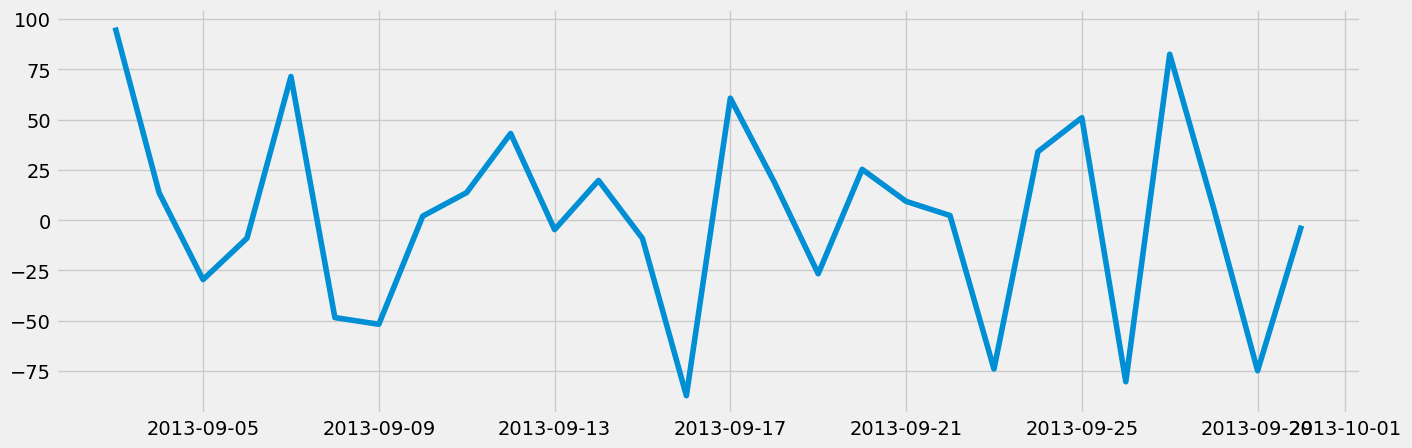

In [90]:
# that worked now to plot the result
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_st2)

# Autocorrelation

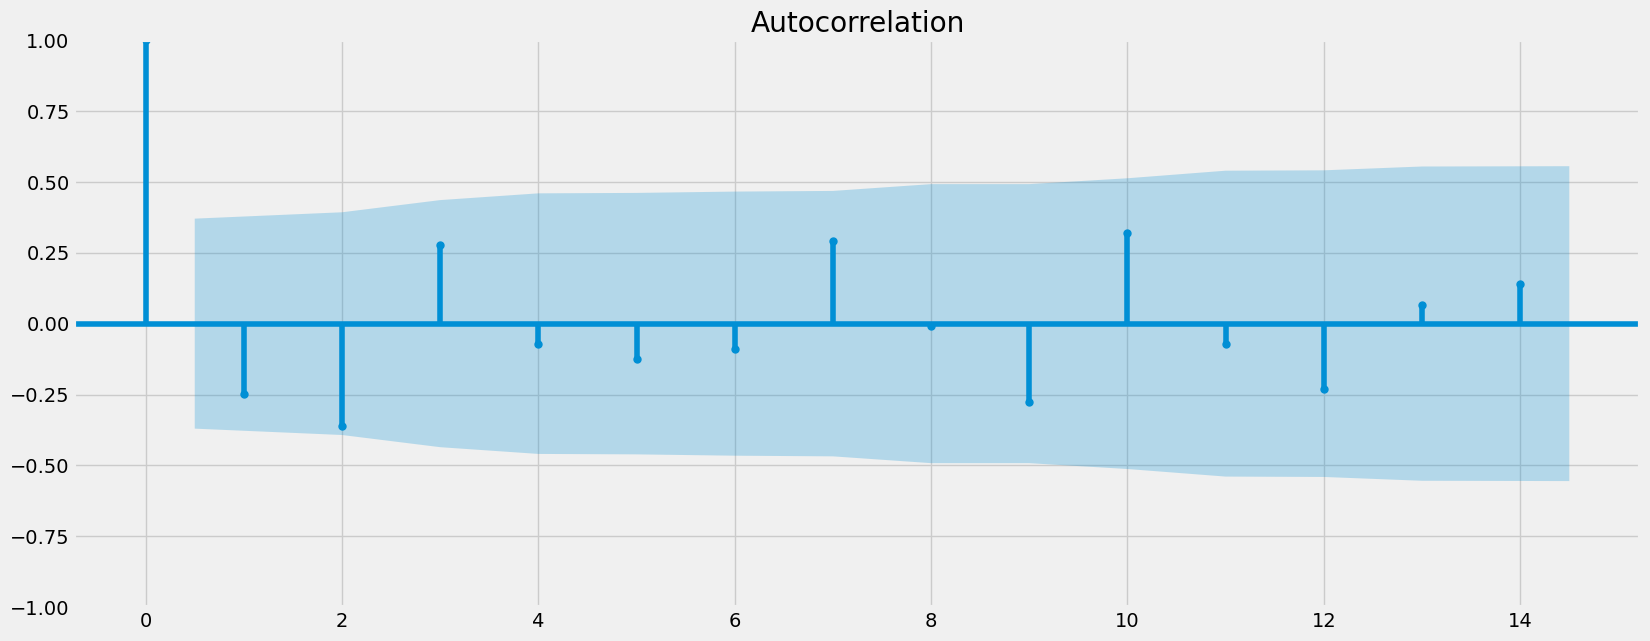

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_st2)
plt.show()